**Nome:**Laura\
**Cognome**: Nembrini \
**Matricola:** 819059

## ASSIGNMENT 4

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib import pyplot as plt

from tensorflow import keras
from keras.models import Model
from keras.layers import Dense, Activation, Input, Dropout, Flatten, BatchNormalization, MaxPooling2D, Conv2D, ReLU, Softmax
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

keras.__version__

'2.7.0'

#Caricamento dataset **MNIST** e **cifar10**


*MNIST* è una vasta base di dati di cifre scritte a mano mentre *Cifar10* è una raccolta di immagini appartenenti a 10 classi differenti (rane, automobili, uccelli ecc)

In [ ]:
#MNIST from keras
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape,
      x_test.shape)

(60000, 28, 28) (10000, 28, 28)


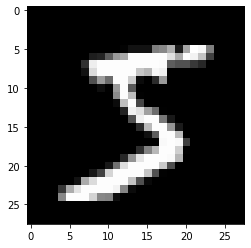

In [ ]:
plt.imshow(x_train[0], cmap='gray')

In [ ]:
#Cifar10 from keras
(x_train2, y_train2), (x_test2, y_test2) = keras.datasets.cifar10.load_data()

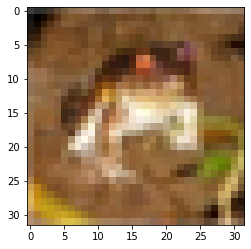

In [ ]:
plt.imshow(x_train2[0], cmap='gray')

## Preprocessing

Le immagini e le labels, per essere processate in keras, hanno bisogno di essere leggermente modificate. In particolare, per le immagini del dataset MNIST, verrà aggiunta una dimensione dedicata al canale di colore e verrà cambiato il range di valori tra 0 e 1. Le label verranno trasformate attraverso il metodo one-hot encoding.

In [ ]:
def preprocessing(X):
  X = np.expand_dims(X, axis=-1)
  X = X.astype('float32')/255.0
  return X

In [ ]:
#MNIST
x_train = preprocessing(x_train)
x_test = preprocessing(x_test)

In [ ]:
#CIFAR10
x_train2 = x_train2.astype('float32')/255.0
x_test2 = x_test2.astype('float32')/255.0

In [ ]:
print('Dataset MINST:')
print('Train:', x_train.shape)
print('Test:', x_test.shape)

print('Dataset CIFAR10:')
print('Train:', x_train2.shape)
print('Test:', x_test2.shape)

Dataset MINST:
Train: (60000, 28, 28, 1)
Test: (10000, 28, 28, 1)
Dataset CIFAR10:
Train: (50000, 32, 32, 3)
Test: (10000, 32, 32, 3)


trasformazione labels: vengono trasformate attraverso la funzione *to_categorical* che effettua la seguente trasformazione: indicando il numero di classi pari a 10 con la variabile num_classes, crea un array di 10 valori e ad esempio il numero 5 sarà equivalente ad un array con tutti 0 tranne la posizione 6 che conterrà il numero 1. 

In [ ]:
#MNIST
num_classes = 10
yc_train = keras.utils.to_categorical(y_train, num_classes)
yc_test = keras.utils.to_categorical(y_test, num_classes)

yc_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
#CIFAR10
yc_train2 = keras.utils.to_categorical(y_train2, num_classes)
yc_test2 = keras.utils.to_categorical(y_test2, num_classes)

yc_train2[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

yc_train2 = keras.utils.to_categorical(y_train2, num_classes)
yc_test2 = keras.utils.to_categorical(y_test2, num_classes)

yc_train2[0]

# Creazione della rete neurale

Rete neurale con seguente architettura:

1. input layer esplicito
2. layer di convoluzione 2D con 32 filtri 3x3
3. reLU
4. layer di maxpooling 
5. flattening
6. fully connected che mappi a 128 neuroni
7. reLU
8. fully connected che mappi alla dimensione del problema


In [ ]:
model = keras.Sequential() #mopdello di tipo sequenziale
model.add(keras.Input(shape = (x_train.shape[1], x_train.shape[2], 1)))#faccio aggiunte a un modello inizialmente vuoto
model.add(keras.layers.Conv2D(32, (3, 3))) #layer di convoluzione 2D con 32 filtri 3x3
model.add(keras.layers.ReLU()) #reLU
model.add(keras.layers.MaxPooling2D(pool_size=(2,2))) #layer di maxpooling
model.add(keras.layers.Flatten()) #flattening
model.add(keras.layers.Dense(128, activation= 'relu')) #fully connected che mappi a 128 neuroni
model.add(keras.layers.Dense(num_classes, activation= 'softmax')) #fully connected che mappi alla dimensione del problema



In [ ]:

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 re_lu_2 (ReLU)              (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 5408)              0         
                                                                 
 dense_10 (Dense)            (None, 128)               692352    
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                      

# Addestramento della rete

In [ ]:
def plot_history(history):
  fig = plt.figure(figsize=(18,6))

  fig.add_subplot(1,2,1)
  plt.plot(history.history['accuracy'], marker='.')
  plt.plot(history.history['val_accuracy'], marker='.')
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')

  fig.add_subplot(1,2,2)
  plt.plot(history.history['loss'], marker='.')
  plt.plot(history.history['val_loss'], marker='.')
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

###MNIST datasets

In [ ]:
# Model training
history_minst = model.fit(x_train, yc_train,
                          batch_size=128,
                          epochs=20, 
                          verbose=1,
                          validation_data=(x_test, yc_test));

Epoch 1/20
469/469 [==============================] - 33s 70ms/step - loss: 0.9024 - accuracy: 0.8295 - val_loss: 0.8450 - val_accuracy: 0.8424
Epoch 2/20
469/469 [==============================] - 32s 69ms/step - loss: 0.8382 - accuracy: 0.8347 - val_loss: 0.7851 - val_accuracy: 0.8476
Epoch 3/20
469/469 [==============================] - 32s 69ms/step - loss: 0.7828 - accuracy: 0.8401 - val_loss: 0.7335 - val_accuracy: 0.8527
Epoch 4/20
469/469 [==============================] - 32s 69ms/step - loss: 0.7352 - accuracy: 0.8448 - val_loss: 0.6895 - val_accuracy: 0.8577
Epoch 5/20
469/469 [==============================] - 32s 69ms/step - loss: 0.6942 - accuracy: 0.8495 - val_loss: 0.6516 - val_accuracy: 0.8618
Epoch 6/20
469/469 [==============================] - 32s 69ms/step - loss: 0.6588 - accuracy: 0.8538 - val_loss: 0.6187 - val_accuracy: 0.8670
Epoch 7/20
469/469 [==============================] - 32s 69ms/step - loss: 0.6278 - accuracy: 0.8572 - val_loss: 0.5900 - val_accuracy:

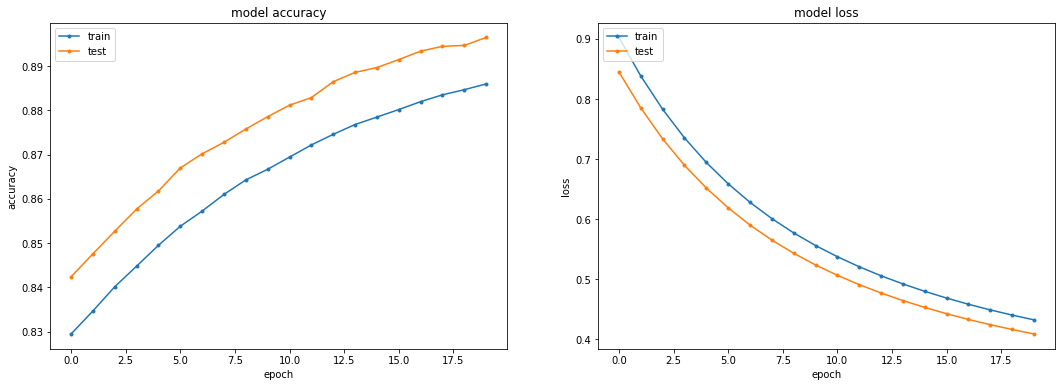

In [ ]:
plot_history(history_minst)

In [ ]:
score = model.evaluate(x_test, yc_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4086153209209442
Test accuracy: 0.8964999914169312


In [ ]:
yc_pred = model.predict(x_test)

In [ ]:
y_pred = np.argmax(yc_pred, axis=1)

Classification report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       980
           1       0.94      0.97      0.95      1135
           2       0.91      0.86      0.88      1032
           3       0.87      0.89      0.88      1010
           4       0.90      0.91      0.90       982
           5       0.89      0.78      0.83       892
           6       0.92      0.93      0.92       958
           7       0.91      0.88      0.90      1028
           8       0.84      0.87      0.85       974
           9       0.86      0.89      0.88      1009

    accuracy                           0.90     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.90      0.90     10000

Confusion matrix:
[[ 954    0    2    2    1    2   10    1    8    0]
 [   0 1096    4    6    1    6    4    0   18    0]
 [  17    4  887   17   17    1   20   23   40    6]
 [   5    1   22  902    0   22    3   21

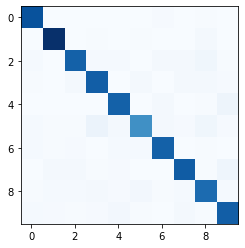

In [ ]:
print('Classification report:')
print(classification_report(y_test, y_pred))


print('Confusion matrix:')
cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.imshow(cm, cmap=plt.cm.Blues)

### CIFAR10 datasets

In [ ]:
model = keras.Sequential() #mopdello di tipo sequenziale
model.add(keras.Input(shape = (x_train2.shape[1], x_train2.shape[2], 3)))#faccio aggiunte a un modello inizialmente vuoto
model.add(keras.layers.Conv2D(32, (3, 3))) #layer di convoluzione 2D con 32 filtri 3x3
model.add(keras.layers.ReLU()) #reLU
model.add(keras.layers.MaxPooling2D(pool_size=(2,2))) #layer di maxpooling
model.add(keras.layers.Flatten()) #flattening
model.add(keras.layers.Dense(128, activation= 'relu')) #fully connected che mappi a 128 neuroni
model.add(keras.layers.Dense(num_classes, activation= 'softmax'))  #fully connected che mappi alla dimensione del problema


In [ ]:
model.compile(loss = keras.losses.categorical_crossentropy,
              optimizer = keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 re_lu_3 (ReLU)              (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 7200)              0         
                                                                 
 dense_12 (Dense)            (None, 128)               921728    
                                                                 
 dense_13 (Dense)            (None, 10)                1290      
                                                      

In [ ]:
# Model training
history_cifar10 = model.fit(x_train2, yc_train2,
                          batch_size=128,
                          epochs=20,
                          verbose=1,
                          validation_data=(x_test2, yc_test2));

Epoch 1/20
391/391 [==============================] - 40s 101ms/step - loss: 2.2882 - accuracy: 0.1462 - val_loss: 2.2726 - val_accuracy: 0.1710
Epoch 2/20
391/391 [==============================] - 39s 100ms/step - loss: 2.2615 - accuracy: 0.1839 - val_loss: 2.2509 - val_accuracy: 0.2010
Epoch 3/20
391/391 [==============================] - 39s 101ms/step - loss: 2.2409 - accuracy: 0.2077 - val_loss: 2.2318 - val_accuracy: 0.2182
Epoch 4/20
391/391 [==============================] - 39s 99ms/step - loss: 2.2225 - accuracy: 0.2228 - val_loss: 2.2144 - val_accuracy: 0.2303
Epoch 5/20
391/391 [==============================] - 39s 99ms/step - loss: 2.2053 - accuracy: 0.2325 - val_loss: 2.1978 - val_accuracy: 0.2377
Epoch 6/20
391/391 [==============================] - 39s 101ms/step - loss: 2.1889 - accuracy: 0.2444 - val_loss: 2.1817 - val_accuracy: 0.2508
Epoch 7/20
391/391 [==============================] - 39s 100ms/step - loss: 2.1731 - accuracy: 0.2536 - val_loss: 2.1663 - val_accu

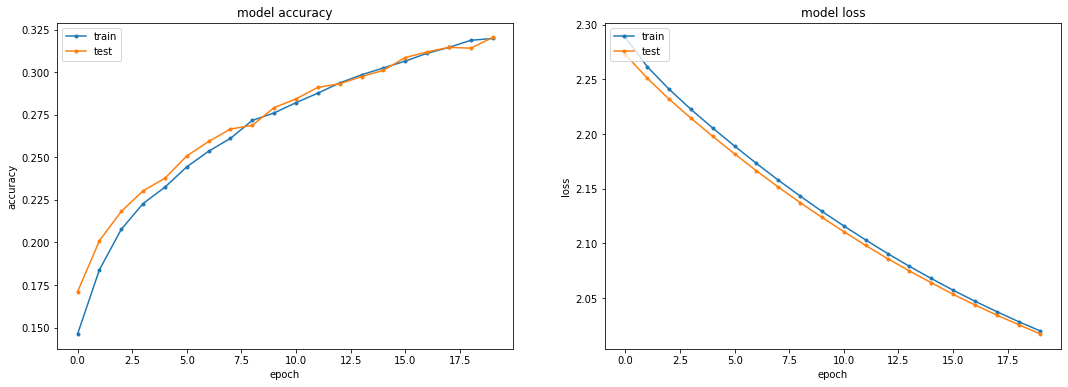

In [ ]:
plot_history(history_cifar10)

In [ ]:
# Evaluation
score = model.evaluate(x_test2, yc_test2, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.0172083377838135
Test accuracy: 0.3203999996185303


In [ ]:
yc_pred = model.predict(x_test2)

In [ ]:
y_pred = np.argmax(yc_pred, axis=1)

Classification report:
              precision    recall  f1-score   support

           0       0.36      0.41      0.38      1000
           1       0.35      0.28      0.31      1000
           2       0.28      0.11      0.16      1000
           3       0.24      0.13      0.17      1000
           4       0.33      0.16      0.21      1000
           5       0.26      0.40      0.31      1000
           6       0.32      0.43      0.37      1000
           7       0.35      0.30      0.32      1000
           8       0.37      0.50      0.42      1000
           9       0.32      0.49      0.39      1000

    accuracy                           0.32     10000
   macro avg       0.32      0.32      0.30     10000
weighted avg       0.32      0.32      0.30     10000

Confusion matrix:
[[412  38  37  19  10  30  27  50 271 106]
 [ 88 278   4  17  19  90  78  24 127 275]
 [163  43 114  62  69 148 188  90  73  50]
 [ 66  54  50 130  39 291 124  98  46 102]
 [ 83  47  71  64 156 124 26

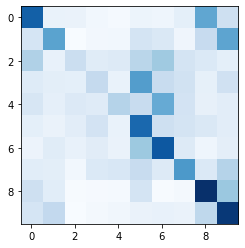

In [ ]:
# Classification report
print('Classification report:')
print(classification_report(y_test2, y_pred))

# Confusion matrix
print('Confusion matrix:')
cm = confusion_matrix(y_test2, y_pred)
print(cm)
plt.imshow(cm, cmap=plt.cm.Blues)

## Conclusioni

l modello di rete neurale implementato è davvero efficace per prevedere le classi di set di dati Mnist, ma su Cifar 10 non funziona molto bene. Infatti con 20 epoche si raggiunge una precisione di solo 0,32 sui dati Cifar mentre lo stesso modello con lo stesso numero di epoche raggiunge una precisione di 0,90 sui dati Mnist.